In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data=pd.read_csv('/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data=data.drop(columns=['CustomerID'],axis=1)
data


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


<Axes: >

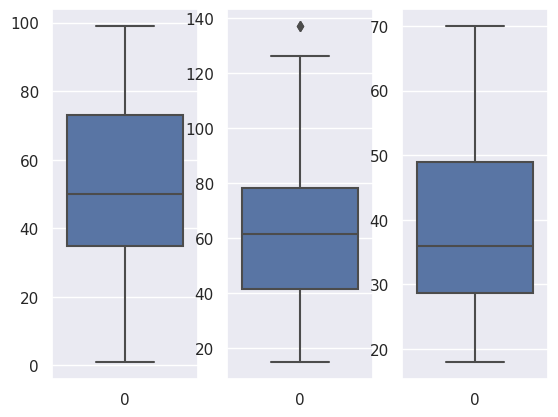

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(data['Spending Score (1-100)'])
plt.subplot(1,3,2)
sns.boxplot(data['Annual Income (k$)'])
plt.subplot(1,3,3)
sns.boxplot(data['Age'])





In [ ]:
data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [ ]:
upperlimit=data['Annual Income (k$)'].quantile(0.95)
upperlimit

103.0

In [ ]:
new_data=data[(data['Annual Income (k$)']>=103.0)]
new_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
188,Female,41,103.0,17,2
189,Female,36,103.0,85,1
190,Female,34,103.0,23,2
191,Female,32,103.0,69,1
192,Male,33,103.0,8,2
193,Female,38,103.0,91,1
194,Female,47,103.0,16,2
195,Female,35,103.0,79,1
196,Female,45,103.0,28,2
197,Male,32,103.0,74,1


In [ ]:
data['Annual Income (k$)']=np.where(data['Annual Income (k$)']>=upperlimit,upperlimit,data['Annual Income (k$)'])
data.shape

(200, 4)

<Axes: >

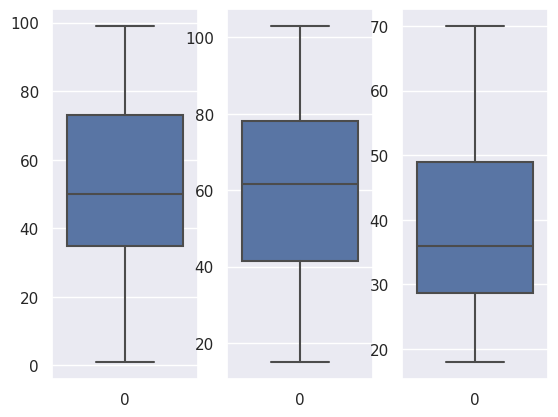

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(data['Spending Score (1-100)'])
plt.subplot(1,3,2)
sns.boxplot(data['Annual Income (k$)'])
plt.subplot(1,3,3)
sns.boxplot(data['Age'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Within-clusters sum of square')

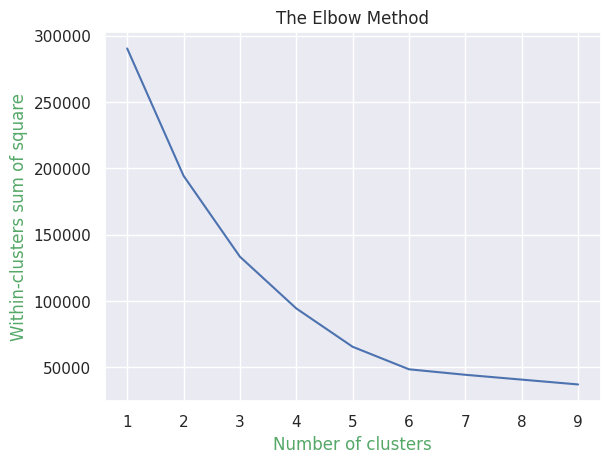

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
    kmeans = KMeans(k)
    kmeans.fit(data.iloc[:,1:5])
    wcss.append(kmeans.inertia_)
number_clusters=range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel("Number of clusters",c='g')
plt.ylabel('Within-clusters sum of square',c='g')

In [ ]:
kmeans=KMeans(6)
label=kmeans.fit_predict(data.iloc[:,1:5])
data['label']=label
data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15.0,39,3
1,Male,21,15.0,81,5
2,Female,20,16.0,6,3
3,Female,23,16.0,77,5
4,Female,31,17.0,40,3
...,...,...,...,...,...
195,Female,35,103.0,79,1
196,Female,45,103.0,28,2
197,Male,32,103.0,74,1
198,Male,32,103.0,18,2


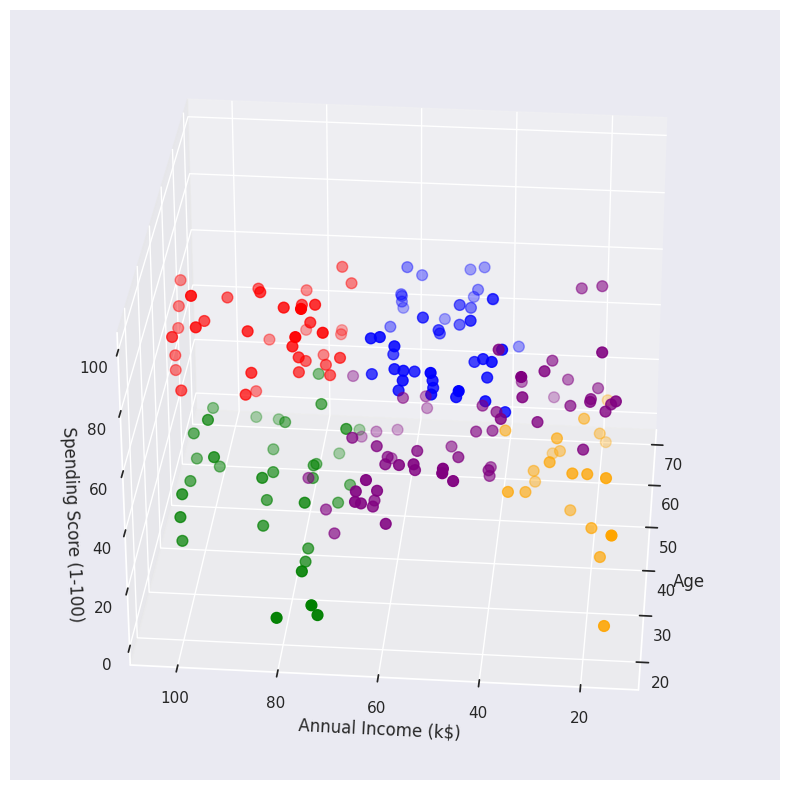

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60)
ax.scatter(data.Age[data.label == 5], data["Annual Income (k$)"][data.label == 5], data["Spending Score (1-100)"][data.label == 5], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()